0.8090169943749475


<IPython.core.display.Javascript object>


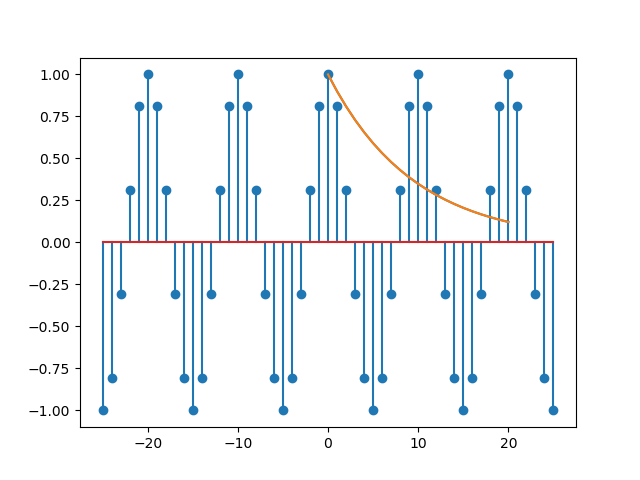

<StemContainer object of 3 artists>

In [99]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as mpt

interval = 51
ref = interval // 2
x = np.arange(-ref, ref + (0 if interval % 2 == 0 else 1), 1)
f = 1
Fs = 10 * f
w = 2 * np.pi * f
y = np.cos((w/Fs) * x )
print(y[ref + 1])

mpt.stem(x, y)

<IPython.core.display.Javascript object>


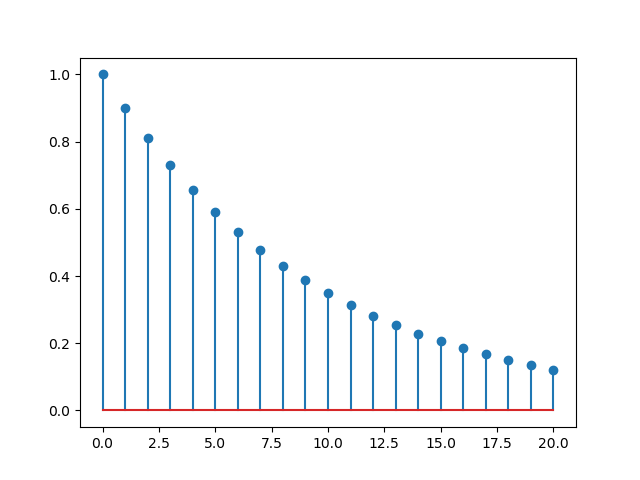

<StemContainer object of 3 artists>

In [117]:
n = np.arange(0, 21, 1)
y = 0.9 ** n
mpt.figure()
mpt.stem(n, y)

Sample rate:  44100
Sample data type:  int16
Data shape:  (485100, 2)
Duration 11.0
Memory usage:  1940400


<IPython.core.display.Javascript object>


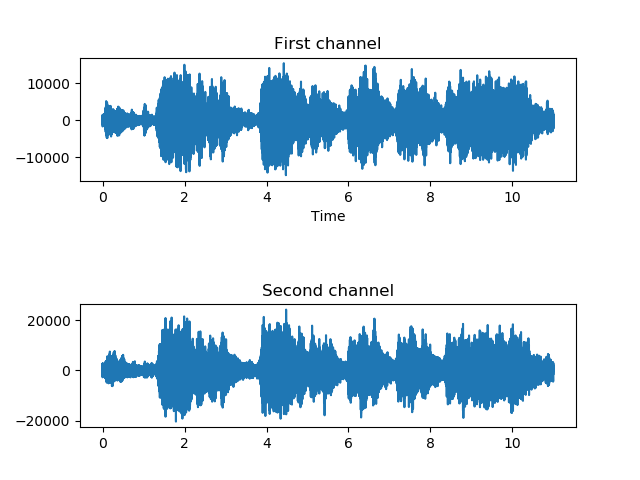

Text(0.5, 1.0, 'Second channel')

In [103]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as mpt
import scipy.io.wavfile as wavfile
import sounddevice as sd
import numpy as np

sampleRate, data = wavfile.read("handel44100.wav")
print("Sample rate: ", sampleRate)
print("Sample data type: ", data.dtype)
print("Data shape: ", data.shape)
print("Duration", data.shape[0] / sampleRate)
print("Memory usage: ", data.nbytes)

x = np.linspace(0, 11, data.shape[0])
ch1 = data[:,0]
ch2 = data[:, 1]
mpt.figure()
mpt.subplots_adjust(hspace = 1)
mpt.subplot(2, 1, 1)
mpt.plot(x, ch1)
mpt.title("First channel")
mpt.xlabel("Time")
mpt.subplot(2, 1, 2)
mpt.plot(x, ch2)
mpt.title("Second channel")

Size:  80
Periods included in buffer:  4.0


<IPython.core.display.Javascript object>


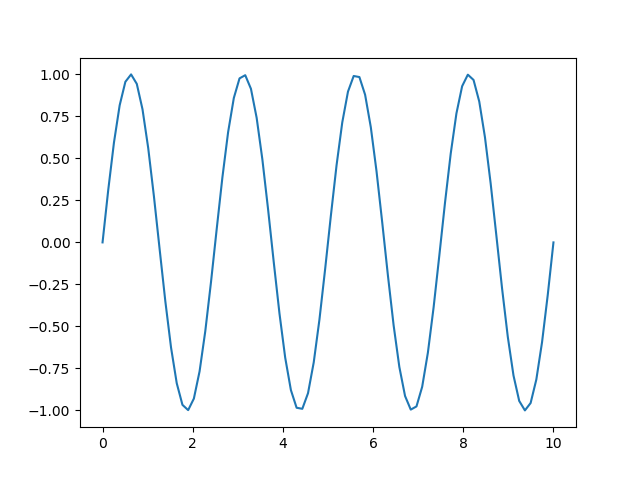

<IPython.core.display.Javascript object>


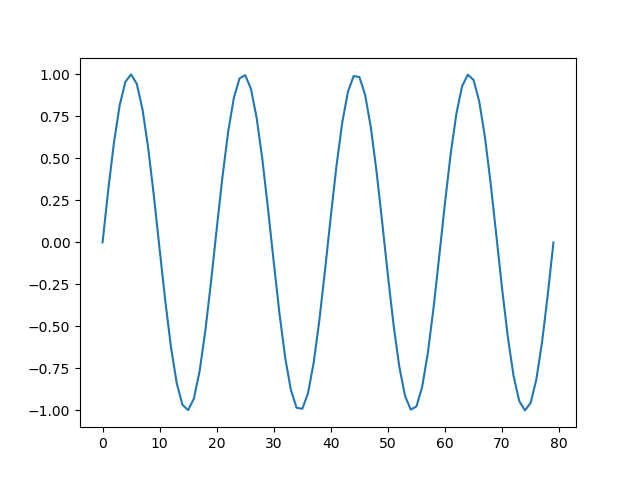

<IPython.core.display.Javascript object>


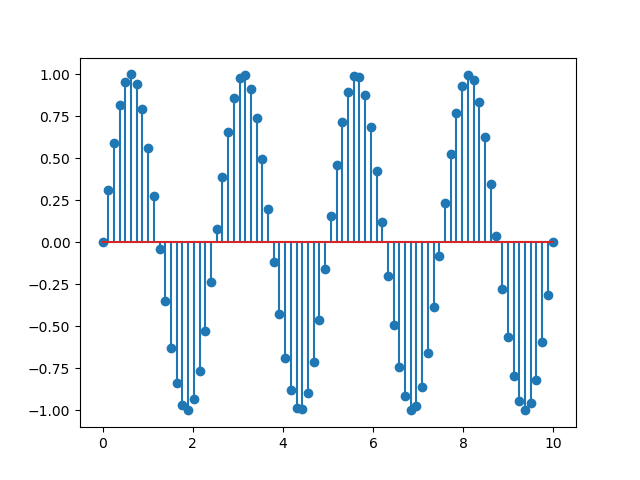

<IPython.core.display.Javascript object>


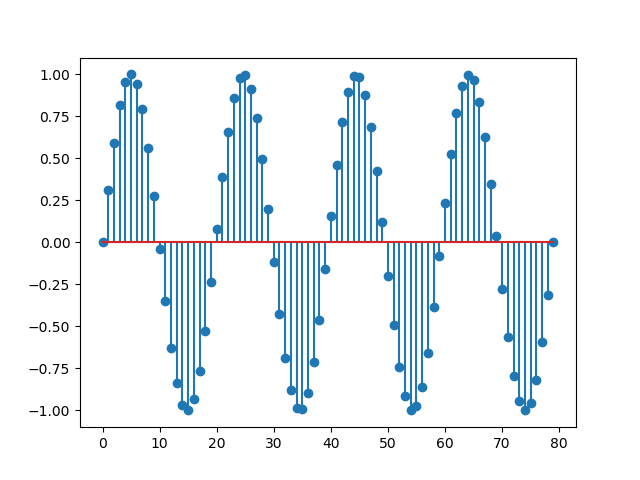

<StemContainer object of 3 artists>

In [56]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot
import sounddevice as sd

def sinus(A, F_0, phi, t_start, t_end, F_s):
    t = np.linspace(t_start, t_end ,round((t_end - t_start) * F_s))
    s = A * np.sin(2 * np.pi * F_0 * t + phi)
    return (s, t)

F_s = 8000
A = 1
F_0 = 400
length = 0.010
phi = 0 * np.pi / 180
s, t = sinus(A, F_0, phi, 0, length, F_s)

tMs = t * 1000
print("Size: ", s.size)
print("Periods included in buffer: ", (s.size / F_s) * F_0)

pyplot.figure()
pyplot.plot(tMs, s)
pyplot.figure()
pyplot.plot(s)
pyplot.figure()
pyplot.stem(tMs, s)
pyplot.figure()
pyplot.stem(s)


In [17]:
import numpy as np

def convolution(x, h):
    resSize = x.size + h.size - 1
    res = np.zeros(resSize)
    
    extendX = np.concatenate((np.zeros(h.size - 1), x, np.zeros(h.size - 1)))
    for n in range(resSize):
        res[n] = extendX[n: n + h.size].dot(h[::-1])
    
    return res


def correlation(x, y):
    return convolution(x, y[::-1])

y = convolution(np.array([0, 1, 1 / 2, 1 / 3, 5, 2]), np.array([1, 1, 0]))
print(y)
print(y.size)

[0.         1.         1.5        0.83333333 5.33333333 7.
 2.         0.        ]
8


[ 1.  4.  8.  8.  3. -2. -1.]


<IPython.core.display.Javascript object>


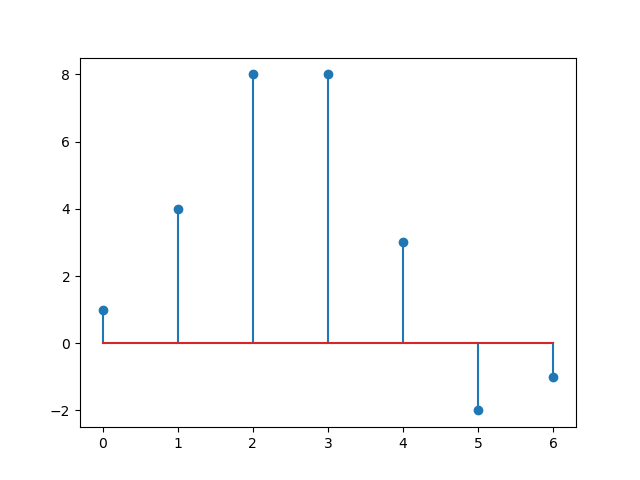

<StemContainer object of 3 artists>

In [15]:
%matplotlib notebook
import matplotlib.pyplot as pyplot
x = np.array([1, 2, 3, 1])
h = np.array([1, 2, 1, -1])

y1 = convolution(x, h)
print(y1)
pyplot.figure()
pyplot.stem(y1)

[ 0.  0.  1.  4.  8.  8.  3. -2. -1.]
[ 0  0  1  4  8  8  3 -2 -1]


<IPython.core.display.Javascript object>


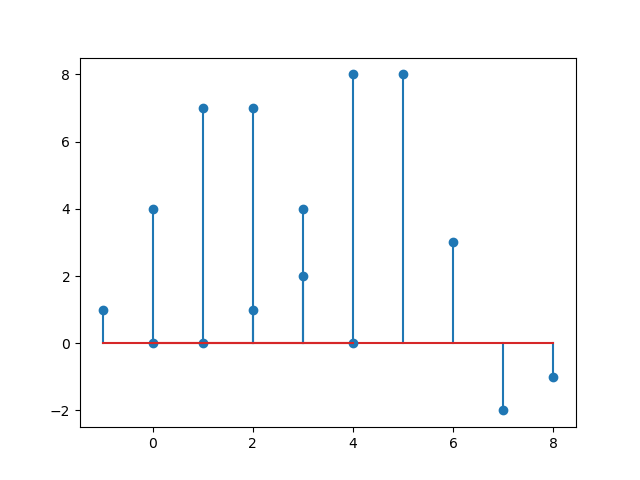

<StemContainer object of 3 artists>

In [16]:
x = np.array([0,0,1,2,3,1])
y2 = convolution(x, h)
y3 = np.convolve(x, h)
print(y2)
print(y3)
pyplot.figure()
pyplot.stem(y2)

[ 1  4  8  8  3 -2 -1]


<IPython.core.display.Javascript object>


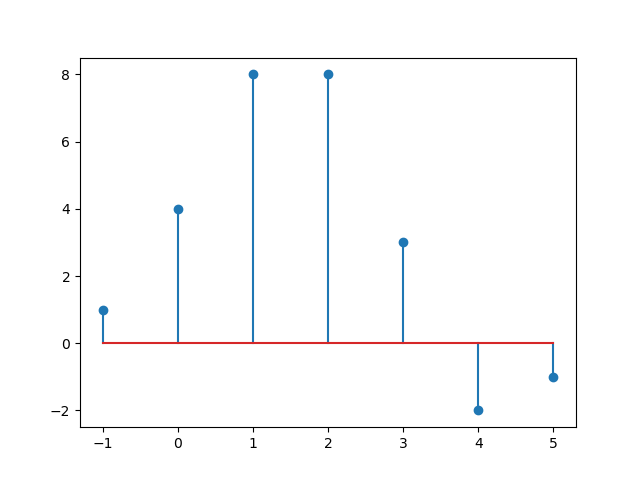

<StemContainer object of 3 artists>

In [28]:
x = np.array([1, 2, 3, 1])
h = np.array([1, 2, 1, -1])
n0 = 1
y = convolution(x, h)
print(y1)
xAxis = np.arange(-n0, x.size + h.size - 1 - n0)
pyplot.figure()
pyplot.stem(xAxis, y)

In [1]:
%matplotlib notebook
import scipy.io.wavfile as wavfile
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal as signal

def convolveCh2Int16(x, h):
    ch1 = signal.fftconvolve(x[:, 0].astype(np.float32), h[:, 0])
    ch2 = signal.fftconvolve(x[:, 1].astype(np.float32), h[:, 1])
    ch1Max = np.amax(np.absolute(ch1))
    ch2Max = np.amax(np.absolute(ch2))
    print(ch1Max)
    print(ch2Max)
    ch1 = (ch1 * (32767 / ch1Max)).astype(np.int16)
    ch2 = (ch2 * (32767 / ch2Max)).astype(np.int16)
    return np.column_stack((ch1, ch2))
    

sampleRate, handel = wavfile.read("handel44100.wav")
impulseSampleRate, impulse = wavfile.read("In The Silo.wav")
res = convolveCh2Int16(handel, impulse)
sd.play(handel, sampleRate)
sd.wait()
sd.play(res, sampleRate)
wavfile.write("out.wav", sampleRate, res)

5156779287.65787
7265728508.977968


<IPython.core.display.Javascript object>


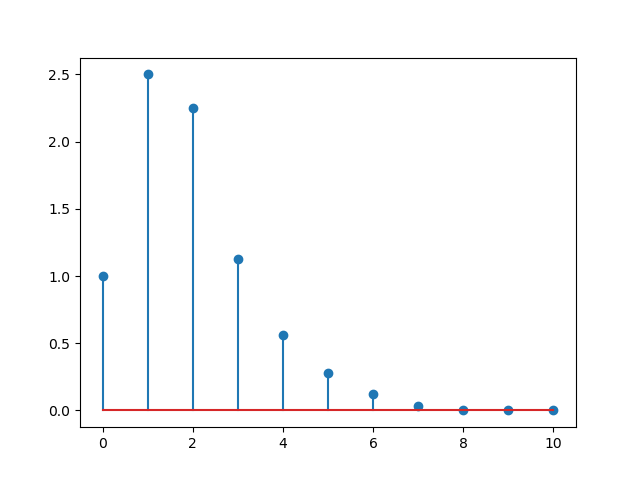

<IPython.core.display.Javascript object>


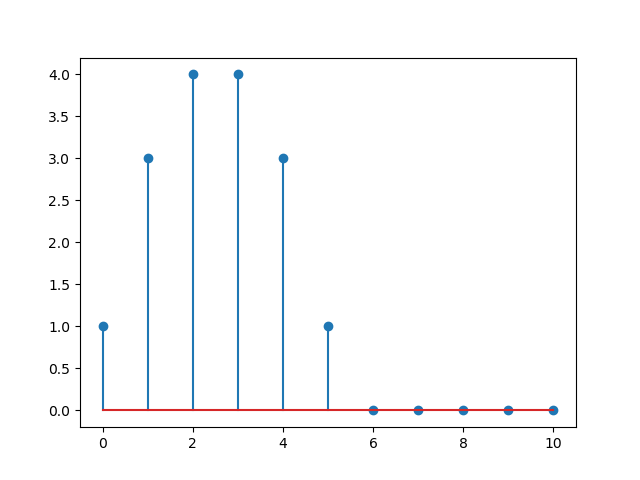

<StemContainer object of 3 artists>

In [47]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot

x = np.array([1, 2, 1])
h1 = np.array([1, 1 / 2, 1 / 4, 1 / 8, 1/16, 1 / 32])
h2 = np.array([1, 1, 1, 1])

res1 = convolution(x, h1)
res2 = convolution(x, h2)
res1 = np.concatenate((res1, np.zeros(11 - res1.size)))
res2 = np.concatenate((res2, np.zeros(11 - res2.size)))
pyplot.figure()
pyplot.stem(np.arange(0, 11), res1)
pyplot.figure()
pyplot.stem(np.arange(0, 11), res2)

<IPython.core.display.Javascript object>


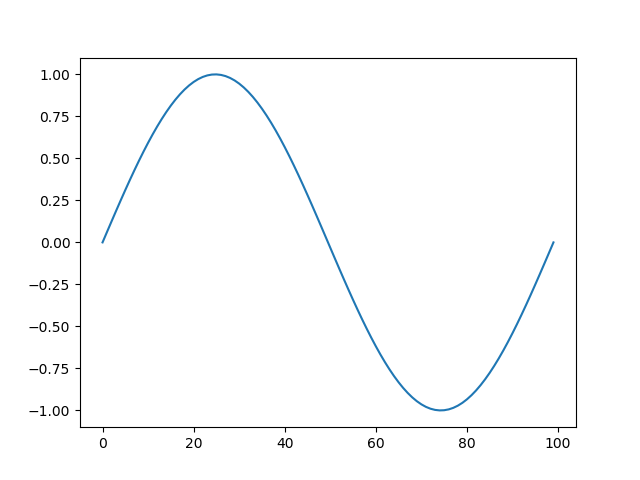

<IPython.core.display.Javascript object>


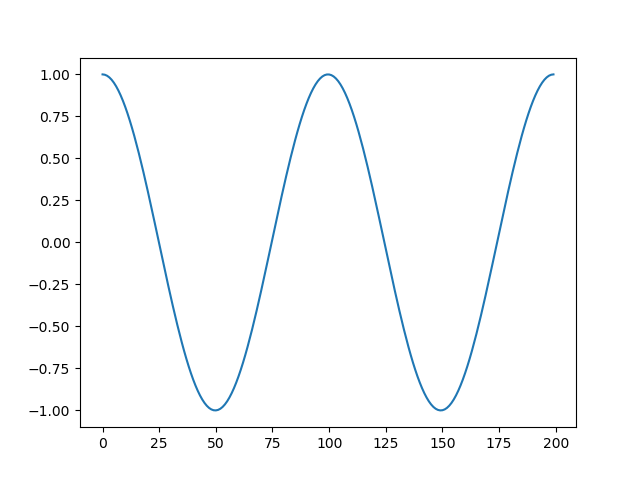

<IPython.core.display.Javascript object>


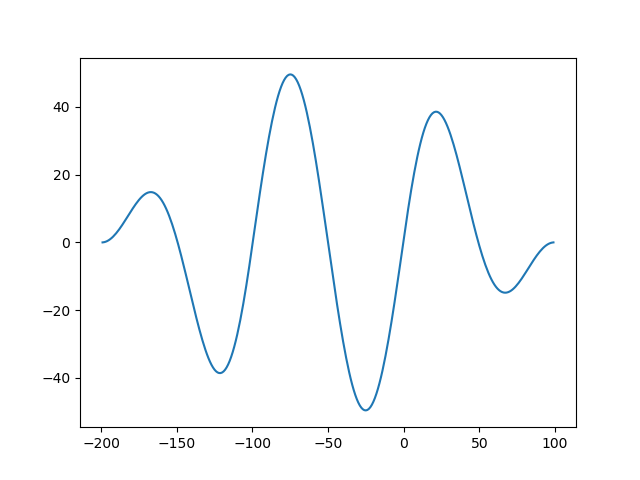

In [23]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal as signal

t1 = np.linspace(0, 1, 100)
t2 = np.linspace(0, 2, 200)
f = 1
x1 = np.sin(2 * np.pi * f * t1)
x2 = np.cos(2 * np.pi * f * t2)
y = correlation(x1, x2)
n = np.arange(y.size) - x2.size + 1 
pyplot.figure()
pyplot.plot(x1)
pyplot.figure()
pyplot.plot(x2)
pyplot.figure()
pyplot.plot(n, y)

<IPython.core.display.Javascript object>


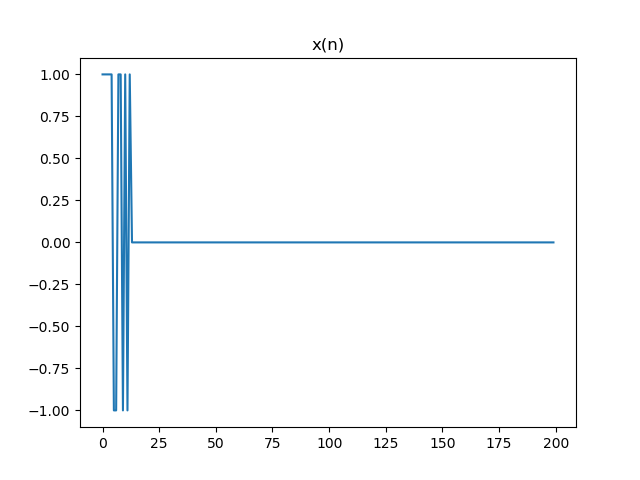

<IPython.core.display.Javascript object>


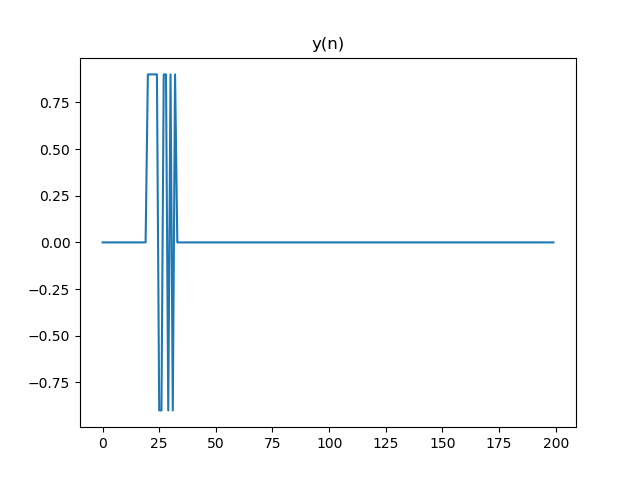

<IPython.core.display.Javascript object>


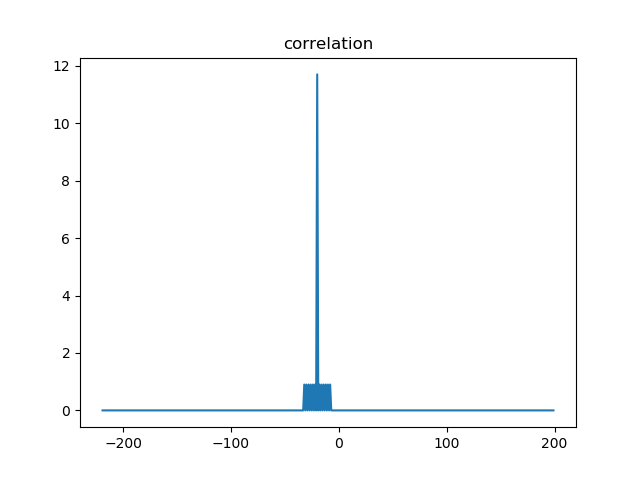

Text(0.5, 1.0, 'correlation')

In [15]:
%matplotlib notebook
import numpy.random as random
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal as signal

a = 0.9
D = 20
x = np.array([ 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1])
x = np.concatenate((x, np.zeros(200 - x.size)))
w = random.normal(0, 0.01 ** (1 / 2), x.size + D)
n = np.arange(0, 200)
y = a * np.concatenate((np.zeros(D), x))
pyplot.figure()
pyplot.plot(n, x[:n.size])
pyplot.title("x(n)")
pyplot.figure()
pyplot.plot(n, y[:n.size])
pyplot.title("y(n)")
corr = signal.correlate(x, y)
corrN = np.arange(0, corr.size) - y.size + 1
pyplot.figure()
pyplot.plot(corrN, corr)
pyplot.title("correlation")

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal as signal
import sounddevice as sd
import scipy.io.wavfile as wavfile
import numpy.random as random

(sampleRate, sound) = wavfile.read("handel44100.wav")
noise = random.normal(0, 100, sound.shape)
soundNoise = (sound + noise).astype(np.int16)
averageCount = 4
average = np.full(averageCount, 1 / averageCount)

noiseReducedCh1 = signal.convolve(soundNoise[:, 0], average).astype(np.int16)
noiseReducedCh2 = signal.convolve(soundNoise[:, 1], average).astype(np.int16)
noiseReduced = np.column_stack((noiseReducedCh1, noiseReducedCh2))

sd.play(soundNoise, sampleRate);
sd.wait()
sd.play(noiseReduced, sampleRate)
sd.wait()

pyplot.figure()
pyplot.plot(sound[:, 0])
pyplot.figure()
pyplot.plot(noise[:, 0])
pyplot.figure()
pyplot.plot(soundNoise[:, 0])
pyplot.figure()
pyplot.plot(noiseReduced[:, 0])

